In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm



In [2]:
energy_data = pd.read_csv('fake_energy_data.csv')
energy_data

,rowid,consumption,income,floor_area,property_age,tenure,bedrooms,property_type,region,country,adults
0,1,20603.441612,38397.808961,51 to 100,Post 1999,Privately rented,6,end terrace,York and Humber,England,4
1,2,12210.239955,32742.293735,51 to 100,1945 to 1964,Council/Housing Association,4,unknown,North West,England,2
2,3,16236.108183,49932.848081,151 to 200,Post 1999,Council/Housing Association,5,purpose built flat,West Midlands,England,3
3,4,17406.051045,31932.013769,101 to 150,1984 to 1992,Owner-occupied,6,end terrace,York and Humber,England,2
4,5,16413.743359,27745.425189,51 to 100,1984 to 1992,Privately rented,7,converted flat,Wales,Wales,3
...,...,...,...,...,...,...,...,...,...,...,...
1126,1127,12187.138601,30236.347929,50 or less,1984 to 1992,Privately rented,5,converted flat,York and Humber,England,5 or more
1127,1128,17172.562398,34375.622258,201 to 250,1919 to 1944,Privately rented,5,semi-detached,North East,England,4
1128,1129,10763.637477,35745.997930,Over 250,1919 to 1944,Owner-occupied,5,purpose built flat,London,England,2
1129,1130,13836.099963,22590.829975,201 to 250,1919 to 1944,Owner-occupied,6,mid terraced,South East,England,5 or more


In [3]:
energy_data.isna().sum()

rowid             0
consumption       0
income           31
floor_area        0
property_age      0
tenure            0
bedrooms          0
property_type     0
region            0
country           0
adults            0
dtype: int64

<Axes: >

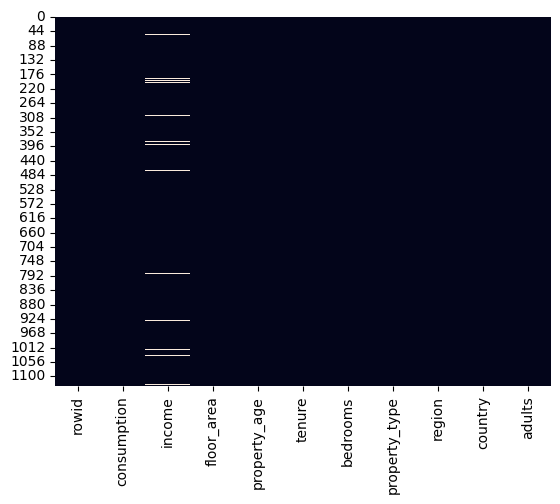

In [4]:
sns.heatmap(energy_data.isna(), cbar=False)

In [5]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rowid          1131 non-null   int64  
 1   consumption    1131 non-null   float64
 2   income         1100 non-null   float64
 3   floor_area     1131 non-null   object 
 4   property_age   1131 non-null   object 
 5   tenure         1131 non-null   object 
 6   bedrooms       1131 non-null   int64  
 7   property_type  1131 non-null   object 
 8   region         1131 non-null   object 
 9   country        1131 non-null   object 
 10  adults         1131 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 97.3+ KB


In [6]:
energy_data['consumption'].describe()

count     1131.000000
mean     14505.044284
std       4353.164634
min       -434.000000
25%      11619.093885
50%      14577.923665
75%      17470.083932
max      29816.701574
Name: consumption, dtype: float64

In [7]:
# If the skew value lies between -0.5 and +0.5 we would describe it as fairly symmetrical

energy_data['consumption'].skew()

-0.03227907730357195

In [8]:
energy_data['income'].describe()

count       1100.000000
mean       34271.968901
std        30979.649710
min         1417.554787
25%        26522.985870
50%        33496.458657
75%        40151.371550
max      1000000.000000
Name: income, dtype: float64

In [9]:
energy_data['income'].skew()

27.624155045002375

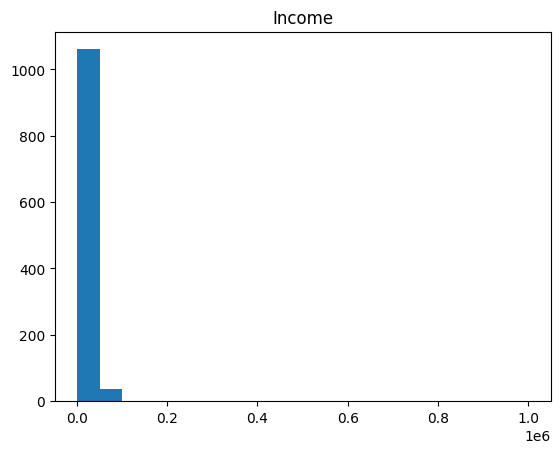

In [10]:
plt.hist(energy_data['income'], bins=20)
plt.title('Income')
plt.show()

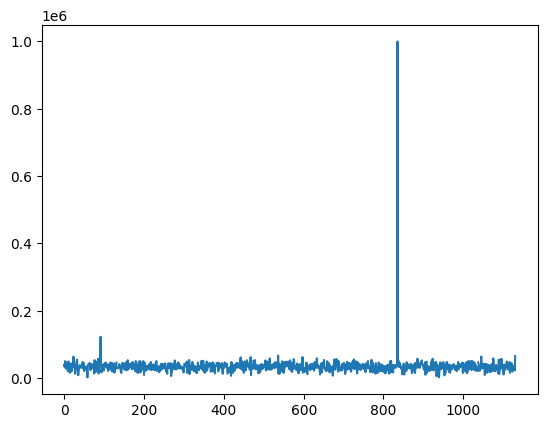

In [11]:
plt.plot(energy_data['income'])

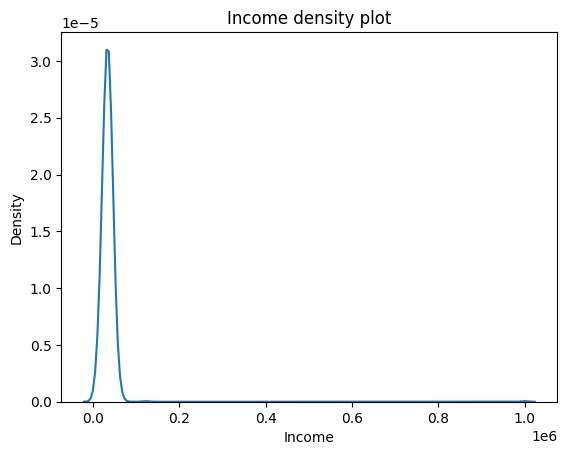

In [12]:
sns.kdeplot(energy_data['income'])
plt.title('Income density plot')
plt.xlabel('Income')
plt.ylabel('Density')
plt.show()

<Axes: xlabel='income', ylabel='Count'>

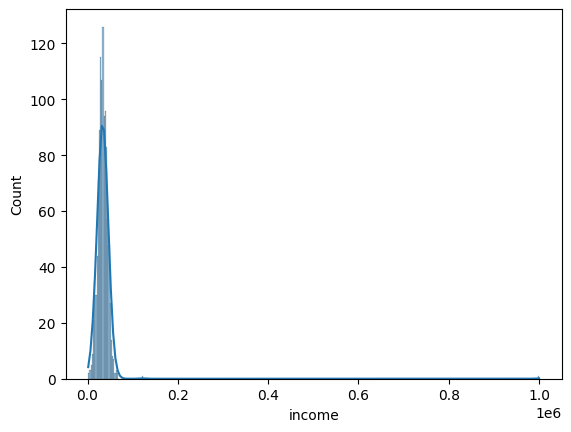

In [13]:
sns.histplot(energy_data['income'], kde=True)

In [14]:
data = energy_data.copy()

In [15]:
data = data[data['income'] < 70000]
data

,rowid,consumption,income,floor_area,property_age,tenure,bedrooms,property_type,region,country,adults
0,1,20603.441612,38397.808961,51 to 100,Post 1999,Privately rented,6,end terrace,York and Humber,England,4
1,2,12210.239955,32742.293735,51 to 100,1945 to 1964,Council/Housing Association,4,unknown,North West,England,2
2,3,16236.108183,49932.848081,151 to 200,Post 1999,Council/Housing Association,5,purpose built flat,West Midlands,England,3
3,4,17406.051045,31932.013769,101 to 150,1984 to 1992,Owner-occupied,6,end terrace,York and Humber,England,2
4,5,16413.743359,27745.425189,51 to 100,1984 to 1992,Privately rented,7,converted flat,Wales,Wales,3
...,...,...,...,...,...,...,...,...,...,...,...
1126,1127,12187.138601,30236.347929,50 or less,1984 to 1992,Privately rented,5,converted flat,York and Humber,England,5 or more
1127,1128,17172.562398,34375.622258,201 to 250,1919 to 1944,Privately rented,5,semi-detached,North East,England,4
1128,1129,10763.637477,35745.997930,Over 250,1919 to 1944,Owner-occupied,5,purpose built flat,London,England,2
1129,1130,13836.099963,22590.829975,201 to 250,1919 to 1944,Owner-occupied,6,mid terraced,South East,England,5 or more


In [16]:
data.fillna(data['income'].mean(), inplace=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1098 entries, 0 to 1130
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rowid          1098 non-null   int64  
 1   consumption    1098 non-null   float64
 2   income         1098 non-null   float64
 3   floor_area     1098 non-null   object 
 4   property_age   1098 non-null   object 
 5   tenure         1098 non-null   object 
 6   bedrooms       1098 non-null   int64  
 7   property_type  1098 non-null   object 
 8   region         1098 non-null   object 
 9   country        1098 non-null   object 
 10  adults         1098 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 102.9+ KB


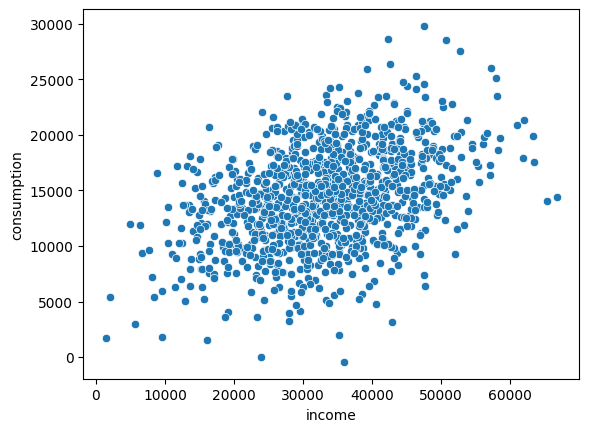

In [18]:
sns.scatterplot(data=data,
                x='income',
                y='consumption')
plt.show()

In [19]:
# Create linear model - selecting X/Y features
# 

X = data[['income']]
y = data['consumption']

model = LinearRegression()

In [20]:
# Fit model

model.fit(X,y)

LinearRegression()

In [21]:
print('Intercept', model.intercept_)
print('Coefficient', model.coef_)

Intercept 8809.326327713337
Coefficient [0.17107679]


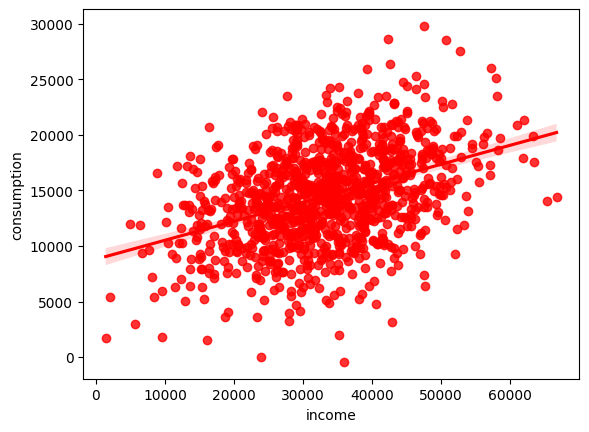

In [46]:
coef = model.coef_
intercept = model.intercept_

sns.scatterplot(data=data,
                x='income',
                y='consumption')

plt.plot(data['income'], coef*data['income'] + intercept, color='red')

# Alternative plot
#salary_best_fit = sns.regplot(data=data,
#                              x='income',
#                              y='consumption',
#                              color='red',
#                              ci=95) # we can specify the confidence interval

plt.show()

In [34]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X)
MSE = mean_squared_error(y, y_pred)

RMSE = MSE**0.5
print('Mean squared error:', MSE)
print('Root mean squared error:', RMSE) 

Mean squared error: 16081726.369873099
Root mean squared error: 4010.2027841336276


In [35]:
X = data[['income', 'bedrooms']]
y = data['consumption']

model2 = LinearRegression()


In [36]:
model2.fit(X,y)

LinearRegression()

In [37]:
y_pred = model2.predict(X)
MSE = mean_squared_error(y, y_pred)

RMSE = MSE**0.5
print('Mean squared error:', MSE)
print('Root mean squared error:', RMSE) 

Mean squared error: 14521874.12580393
Root mean squared error: 3810.757683952619


In [39]:
print('Intercept', model2.intercept_)
print('Coefficient', model2.coef_)

Intercept 2655.4913786287143
Coefficient [1.71831178e-01 1.22262310e+03]


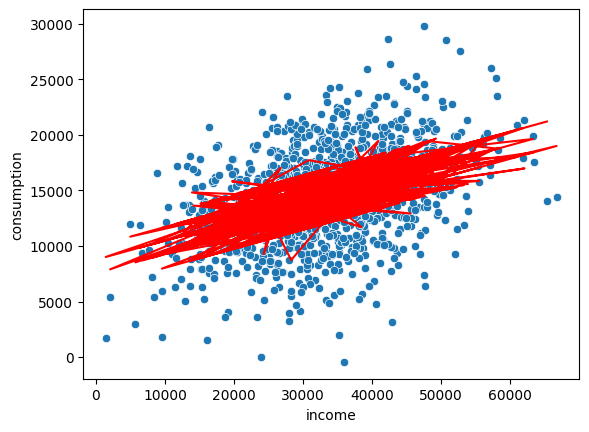

In [40]:
coef1 = model2.coef_[0]
coef2 = model2.coef_[1]
intercept = model2.intercept_

sns.scatterplot(data=data,
                x='income',
                y='consumption')

plt.plot(data['income'], coef1*data['income'] + coef2*data['bedrooms'] + intercept, color='red')

plt.show()

In [ ]:
X = sm.add_constant(X)
ols_model = sm.OLS(y, X).fit()

In [ ]:
print(ols_model.summary())

In [ ]:
ols_model.fit()